# Section 1: Install Dependencies

In [1]:
# Install required packages for the tumor detection project
!pip install ultralytics # YOLO framework
!pip install roboflow # For dataset management
!pip install supervision # For evaluation and visualization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 6.0 MB/s eta 0:00:00


# Section 2: Import Libraries

In [2]:
import torch                  # PyTorch for tensor operations and GPU support
import random                 # For random sampling of validation images
import supervision as sv      # For evaluation metrics and visualization
import torch.optim as optim
from ultralytics import YOLO  # YOLO model for object detection
from PIL import Image         # Image handling and display
from roboflow import Roboflow # Dataset downloading from Roboflow
from supervision.metrics import MeanAveragePrecision # For evaluating object detection model performance

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Section 3: Download Dataset

In [3]:
# Initialize Roboflow and download the brain tumor dataset
rf = Roboflow(api_key="your-api-key")
project = rf.workspace("br34h-dataset-brain-tumor").project("braintumor-br35h")
version = project.version(3)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BrainTumor-Br35H-3 in yolov12:: 100%|██████████| 1411/1411 [00:00<00:00, 9087.75it/s]


# Section 4: Set Device

In [4]:
# Configure device: use GPU if available, otherwise CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


# Section 5: Load and Display Test Image


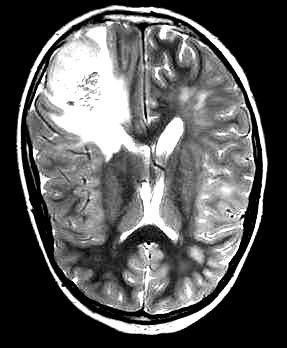

In [5]:
# Define path to a sample test image from the training set
test_img_path = '/kaggle/working/BrainTumor-Br35H-3/train/images/y0_jpg.rf.2d5915d0460c9fa43acf5c054133d09d.jpg'

# Load and display the test image
img = Image.open(test_img_path)
display(img)

# Section 6: Load Pre-trained YOLO Model

In [6]:
# Load the pre-trained YOLO model (large version)
model = YOLO("yolo12l.pt") # Load a YOLOv12 Large model pretrained on the COCO dataset
model.to(device) # Move model to the selected device (GPU/CPU)

100%|██████████| 51.2M/51.2M [00:00<00:00, 125MB/s] 


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_

# Section 7: Inference Before Training

In [7]:
# Perform inference on the test image before training
results_before_train = model(img, save=True)


0: 640x544 1 bowl, 81.0ms
Speed: 16.9ms preprocess, 81.0ms inference, 216.6ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict


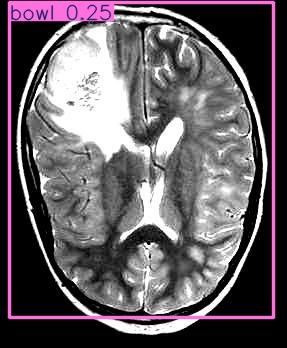

In [8]:
# Load and display the detection output
image_detected_path = '/kaggle/working/runs/detect/predict/y0_jpg.rf.2d5915d0460c9fa43acf5c054133d09d.jpg'
img_before_train = Image.open(image_detected_path)
display(img_before_train)

### 😏 The correct detection was not made


# Section 8: Train the Model

### list of available optimizers {'auto', 'Adam', 'Adamax', 'NAdam', 'AdamW', 'RMSProp', 'RAdam', 'SGD'}

In [9]:
# Train the YOLO model on the brain tumor dataset
results = model.train(data="/kaggle/working/BrainTumor-Br35H-3/data.yaml", epochs=20, time=None, patience=100, batch=16,
                      imgsz=160, save=True, save_period=-1, cache=False, device=device, workers=8, project=None,
                      exist_ok=False, pretrained=True, optimizer='AdamW', verbose=True, seed=0, deterministic=True,
                      single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0,
                      profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0,
                      val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False,
                      dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False,
                      agnostic_nms=False, retina_masks=False, embed=None, show=False, save_frames=False,
                      save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,
                      line_width=None, keras=False, optimize=True, int8=False, dynamic=False,
                      simplify=True, opset=None, workspace=None, nms=False, lr0=0.001, lrf=0.01, momentum=0.937,
                      weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5,
                      dfl=1.5, pose=12.0, kobj=1.0, nbs=64, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1,
                      scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, bgr=0.0, mosaic=1.0, mixup=0.0,
                      copy_paste=0.0, erasing=0.4, crop_fraction=1.0,
                      cfg=None, save_dir='runs/detect/train')

Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo12l.pt, data=/kaggle/working/BrainTumor-Br35H-3/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=160, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 28.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  4   4272944  ultralytics.nn.modules.block.A2C2f           [512, 512, 4, True, 4, True, 1.2]
  7                  -1  1   2360320  ultralyt

100%|██████████| 5.35M/5.35M [00:00<00:00, 115MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/BrainTumor-Br35H-3/train/labels... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 1169.22it/s]

train: New cache created: /kaggle/working/BrainTumor-Br35H-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /kaggle/working/BrainTumor-Br35H-3/valid/labels... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<00:00, 881.44it/s]

val: New cache created: /kaggle/working/BrainTumor-Br35H-3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 205 weight(decay=0.0), 214 weight(decay=0.0005), 211 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 160 train, 160 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       1.8G      1.955      1.759      1.549          5        160: 100%|██████████| 32/32 [00:08<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        201        201      0.935      0.215      0.545       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       1.7G      1.294     0.8651      1.159          7        160: 100%|██████████| 32/32 [00:07<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.26it/s]

                   all        201        201      0.848      0.697      0.801      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       1.7G      1.214     0.7957      1.132         10        160: 100%|██████████| 32/32 [00:07<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.19it/s]

                   all        201        201      0.853      0.826      0.878      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.64G      1.144     0.7296        1.1         11        160: 100%|██████████| 32/32 [00:07<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.24it/s]

                   all        201        201      0.907      0.776      0.885      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.66G      1.137     0.6836      1.106          9        160: 100%|██████████| 32/32 [00:06<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.08it/s]

                   all        201        201      0.896      0.898      0.924      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.66G      1.066     0.6592      1.082          5        160: 100%|██████████| 32/32 [00:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.22it/s]

                   all        201        201      0.946      0.779      0.899      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.64G      1.061     0.6529      1.065          7        160: 100%|██████████| 32/32 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.31it/s]

                   all        201        201      0.946      0.876      0.936      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.66G      1.024     0.6474      1.065          4        160: 100%|██████████| 32/32 [00:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.29it/s]

                   all        201        201      0.905      0.851      0.922      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.66G     0.9934     0.6076      1.047          7        160: 100%|██████████| 32/32 [00:06<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.20it/s]

                   all        201        201      0.943      0.899      0.939      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.66G     0.9964     0.5884      1.044          7        160: 100%|██████████| 32/32 [00:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.91it/s]

                   all        201        201      0.943       0.92       0.94       0.69


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.66G     0.9295     0.5637      1.018          4        160: 100%|██████████| 32/32 [00:07<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.61it/s]

                   all        201        201      0.917      0.875       0.93      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.66G     0.9076     0.5409       1.03          4        160: 100%|██████████| 32/32 [00:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.16it/s]

                   all        201        201      0.945      0.862      0.935      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.66G      0.895     0.5072      1.016          4        160: 100%|██████████| 32/32 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.24it/s]

                   all        201        201      0.933      0.896      0.944      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.65G     0.8579     0.4761     0.9892          4        160: 100%|██████████| 32/32 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.25it/s]

                   all        201        201      0.948      0.899      0.949      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.66G     0.8458     0.4635     0.9981          3        160: 100%|██████████| 32/32 [00:06<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.17it/s]

                   all        201        201      0.953      0.891      0.945      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.65G     0.8332     0.4466     0.9856          4        160: 100%|██████████| 32/32 [00:06<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.09it/s]

                   all        201        201      0.958      0.905      0.939      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.66G     0.8202     0.4456     0.9893          4        160: 100%|██████████| 32/32 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.26it/s]

                   all        201        201      0.948      0.911      0.937      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.65G     0.8292     0.4336     0.9751          4        160: 100%|██████████| 32/32 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.31it/s]

                   all        201        201      0.945      0.915      0.943      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.66G     0.8107     0.4382     0.9859          4        160: 100%|██████████| 32/32 [00:06<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.15it/s]

                   all        201        201      0.916       0.92       0.94      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.65G     0.7864     0.4343     0.9626          4        160: 100%|██████████| 32/32 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.30it/s]

                   all        201        201      0.948      0.886      0.941      0.703



20 epochs completed in 0.058 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 53.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 53.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12l summary (fused): 283 layers, 26,339,843 parameters, 0 gradients, 88.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]


                   all        201        201      0.947      0.897      0.949      0.707


invalid value encountered in less
invalid value encountered in less


Speed: 0.0ms preprocess, 3.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


### YOLOv12l summary (fused): 283 layers, 26,339,843 parameters, 0 gradients, 88.5 GFLOPs

# Section 9: Inference After Training

In [10]:
# Perform inference on the test image after training
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")  # load a fine-tuned model

# Inference using the model (img/video/stream)
results = model.predict("/kaggle/working/BrainTumor-Br35H-3/train/images/y0_jpg.rf.2d5915d0460c9fa43acf5c054133d09d.jpg", save=True)


image 1/1 /kaggle/working/BrainTumor-Br35H-3/train/images/y0_jpg.rf.2d5915d0460c9fa43acf5c054133d09d.jpg: 160x160 1 tumor, 24.3ms
Speed: 0.6ms preprocess, 24.3ms inference, 1.3ms postprocess per image at shape (1, 3, 160, 160)
Results saved to runs/detect/predict2


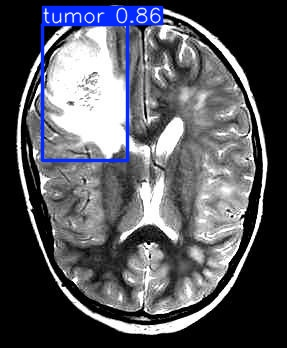

In [11]:
# Load and display the detection output
image_detected_path_after_training = '/kaggle/working/runs/detect/predict2/y0_jpg.rf.2d5915d0460c9fa43acf5c054133d09d.jpg'
img_after_train = Image.open(image_detected_path_after_training)
display(img_after_train)

# Section 10: Evaluate YOLOv12 Model with Plots

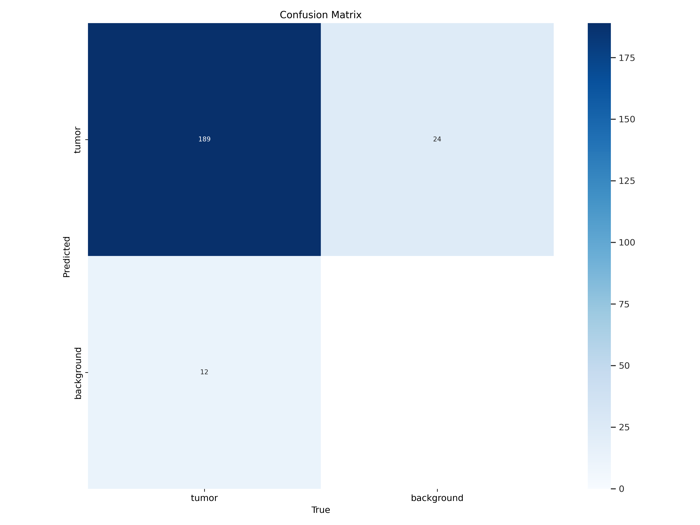

In [12]:
confusion_matrix_path = '/kaggle/working/runs/detect/train/confusion_matrix.png'
confusion_matrix= Image.open(confusion_matrix_path)
max_size = (700, 700)
confusion_matrix.thumbnail(max_size)

display(confusion_matrix)

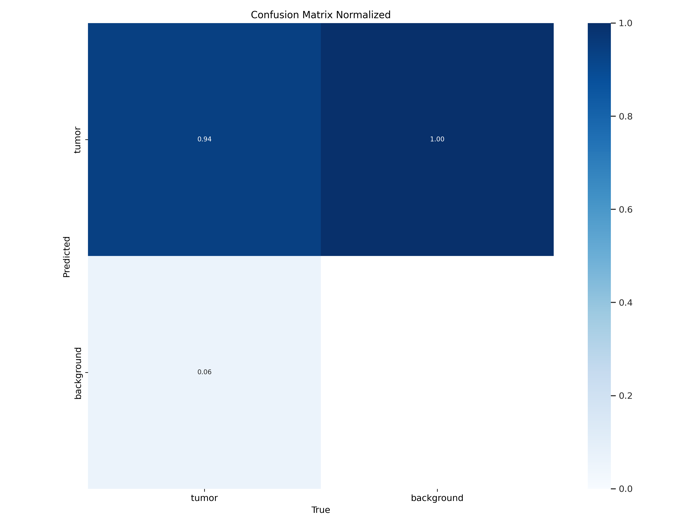

In [13]:
confusion_matrix_normalized_path = '/kaggle/working/runs/detect/train/confusion_matrix_normalized.png'
confusion_matrix_normalized = Image.open(confusion_matrix_normalized_path)
max_size = (700, 700)
confusion_matrix_normalized.thumbnail(max_size)

display(confusion_matrix_normalized)

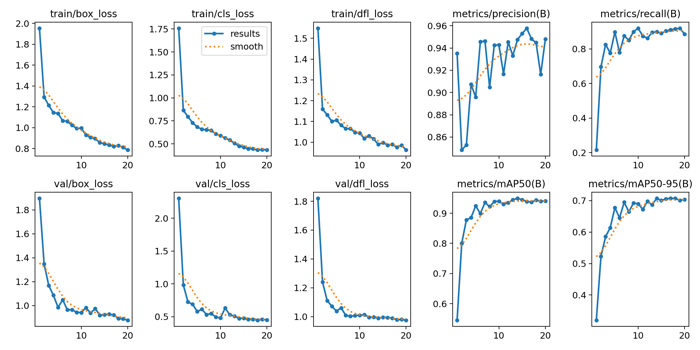

In [14]:
results_path = '/kaggle/working/runs/detect/train/results.png'
results= Image.open(results_path)
max_size = (700, 700)
results.thumbnail(max_size)

display(results)

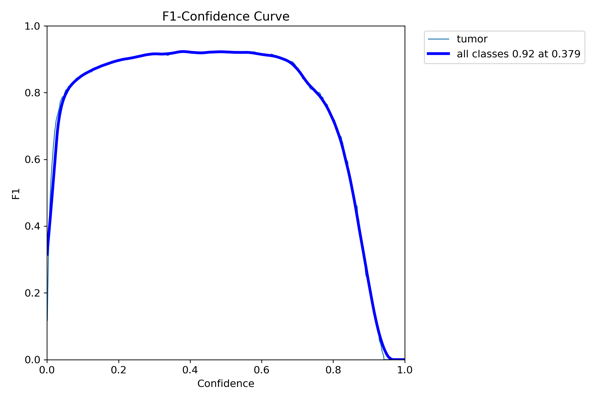

In [15]:
f1_curve_path = '/kaggle/working/runs/detect/train/F1_curve.png'
f1_curve = Image.open(f1_curve_path)
max_size = (600, 600)
f1_curve.thumbnail(max_size)

display(f1_curve)

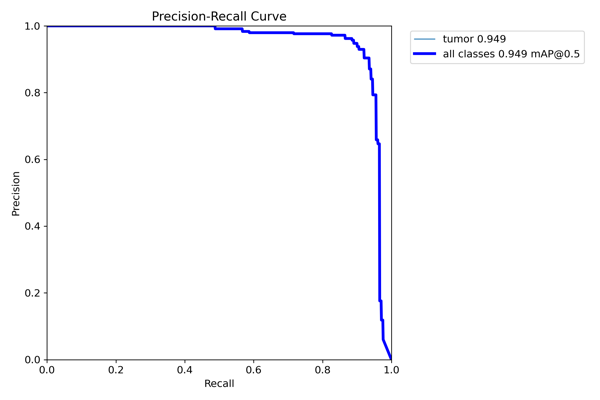

In [16]:
pr_curve_path = '/kaggle/working/runs/detect/train/PR_curve.png'
pr_curve = Image.open(pr_curve_path)
max_size = (600, 600)
pr_curve.thumbnail(max_size)

display(pr_curve)

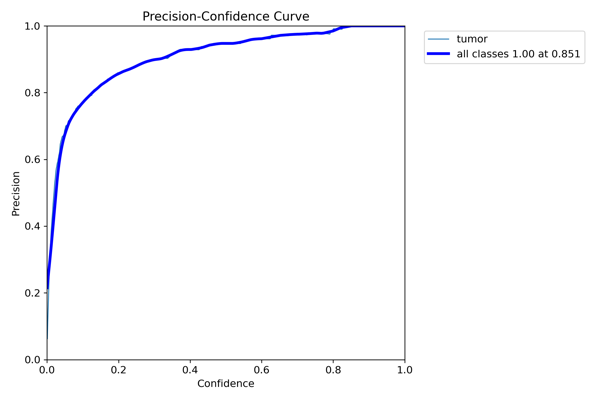

In [17]:
p_curve_path = '/kaggle/working/runs/detect/train/P_curve.png'
p_curve = Image.open(p_curve_path)
max_size = (600, 600)
p_curve.thumbnail(max_size)

display(p_curve)

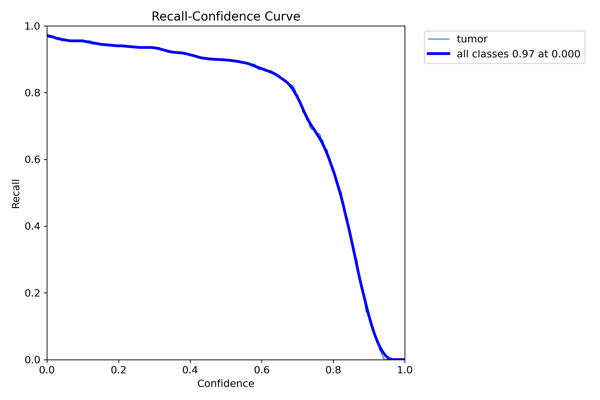

In [18]:
r_curve_path = '/kaggle/working/runs/detect/train/R_curve.png'
r_curve = Image.open(r_curve_path)
max_size = (600, 600)
r_curve.thumbnail(max_size)

display(r_curve)

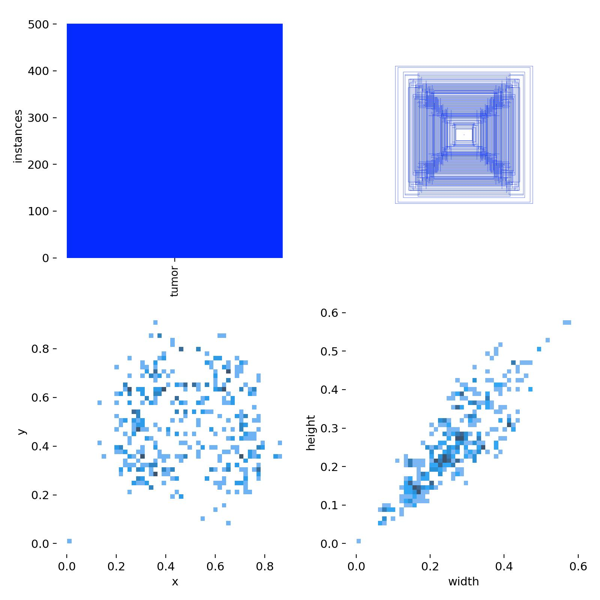

In [19]:
labels_path = '/kaggle/working/runs/detect/train/labels.jpg'
labels = Image.open(labels_path)

max_size = (600, 600)
labels.thumbnail(max_size)

display(labels)

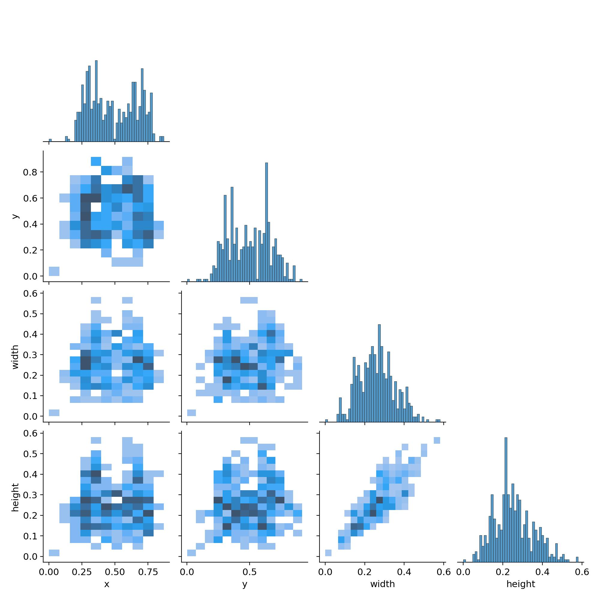

In [20]:
labels_correlogram_path = '/kaggle/working/runs/detect/train/labels_correlogram.jpg'
labels_correlogram = Image.open(labels_correlogram_path)
max_size = (600, 600)
labels_correlogram.thumbnail(max_size)

display(labels_correlogram)

In [ ]:
train_batch0_path = '/kaggle/working/runs/detect/train/train_batch0.jpg'
train_batch0 = Image.open(train_batch0_path)
display(train_batch0)

In [ ]:
train_batch1_path = '/kaggle/working/runs/detect/train/train_batch1.jpg'
train_batch1 = Image.open(train_batch1_path)
display(train_batch1)

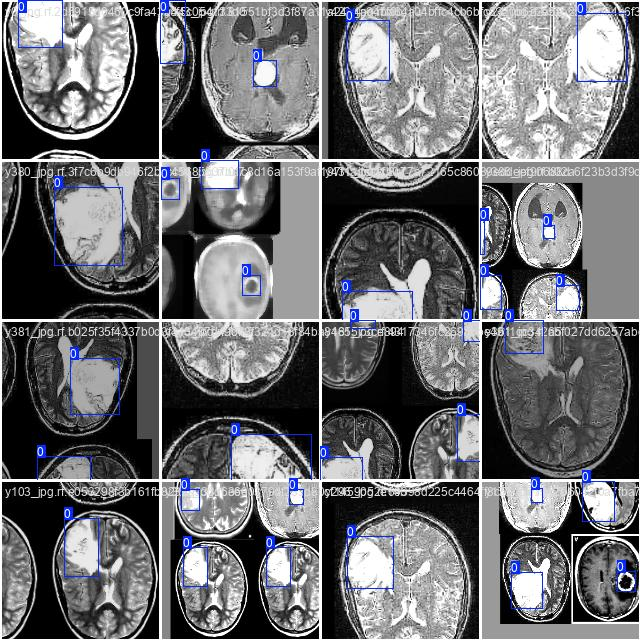

In [ ]:
train_batch2_path = '/kaggle/working/runs/detect/train/train_batch2.jpg'
train_batch2 = Image.open(train_batch2_path)
display(train_batch2)

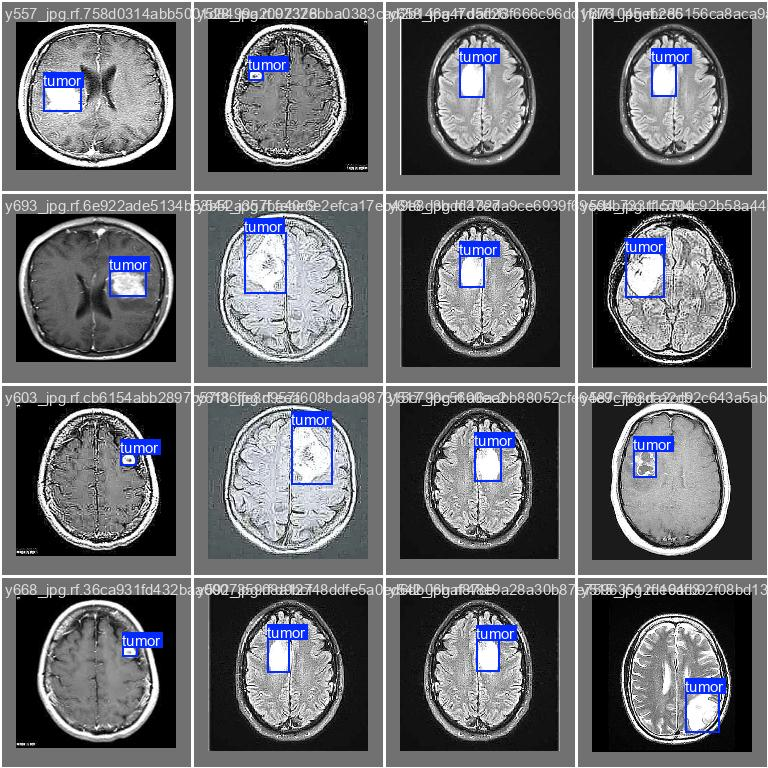

In [ ]:
val_batch0_labels_path = '/kaggle/working/runs/detect/train/val_batch0_labels.jpg'
val_batch0_labels = Image.open(val_batch0_labels_path)
display(val_batch0_labels)

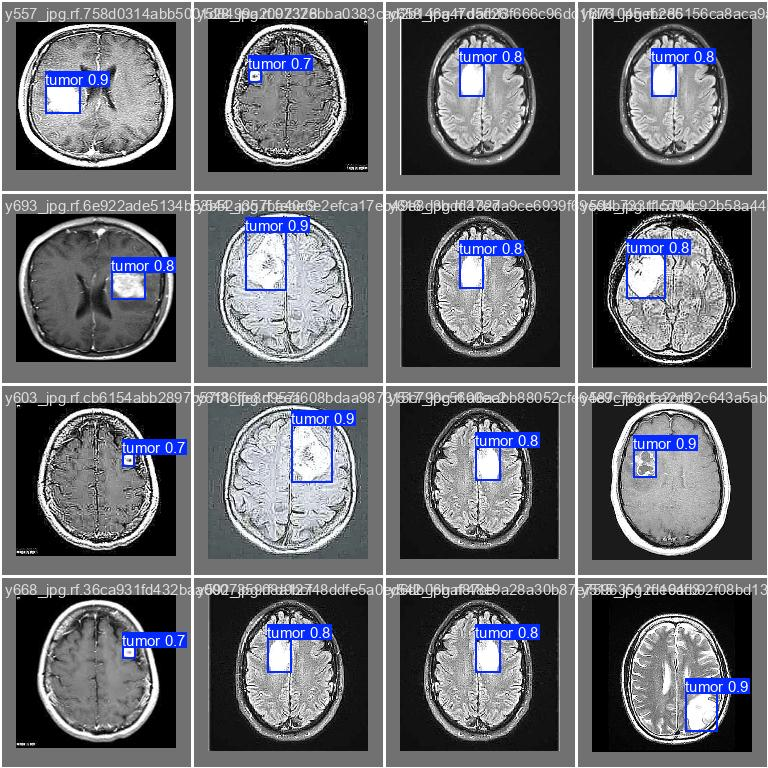

In [ ]:
val_batch0_pred_path = '/kaggle/working/runs/detect/train/val_batch0_pred.jpg'
val_batch0_pred = Image.open(val_batch0_pred_path)
display(val_batch0_pred)

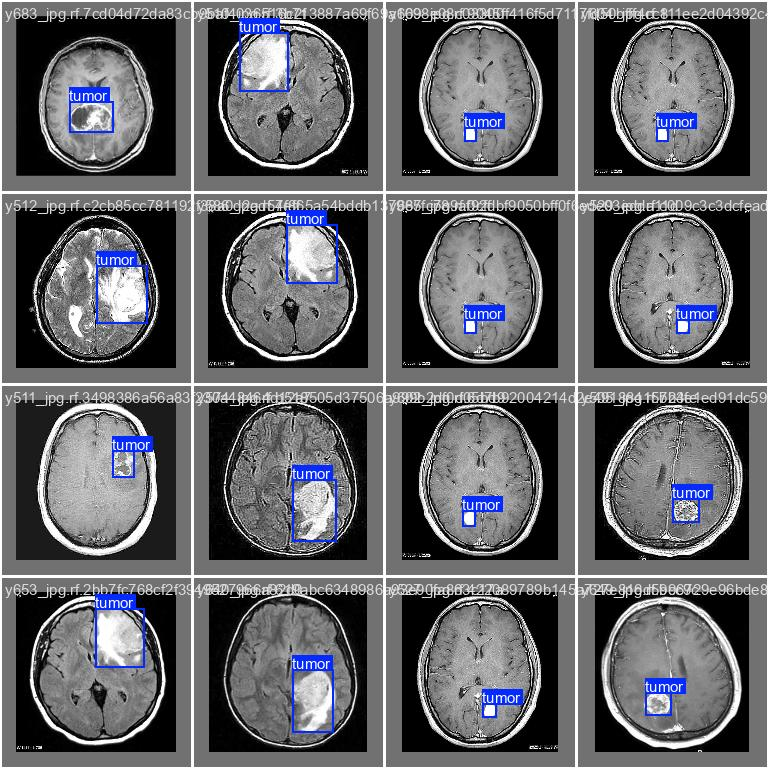

In [ ]:
val_batch1_labels_path = '/kaggle/working/runs/detect/train/val_batch1_labels.jpg'
val_batch1_labels = Image.open(val_batch1_labels_path)
display(val_batch1_labels)

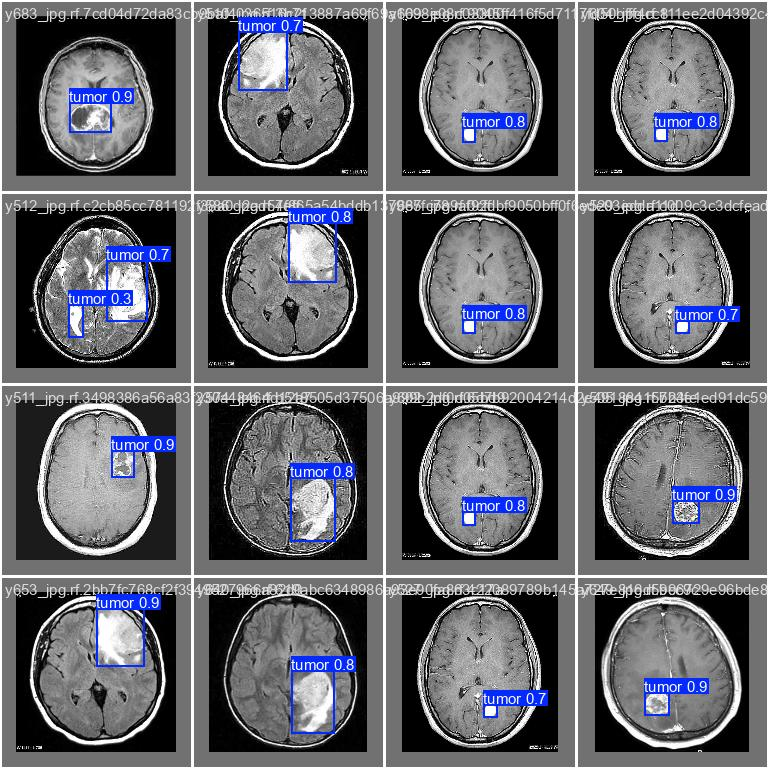

In [ ]:
val_batch1_pred_path = '/kaggle/working/runs/detect/train/val_batch1_pred.jpg'
val_batch1_pred = Image.open(val_batch1_pred_path)
display(val_batch1_pred)

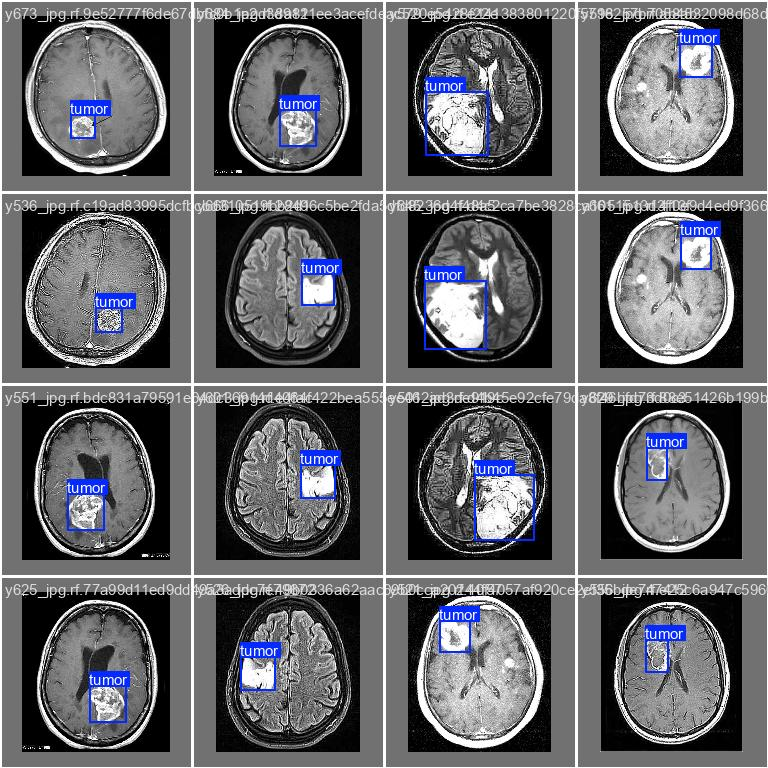

In [ ]:
val_batch2_labels_path = '/kaggle/working/runs/detect/train/val_batch2_labels.jpg'
val_batch2_labels = Image.open(val_batch2_labels_path)
display(val_batch2_labels)

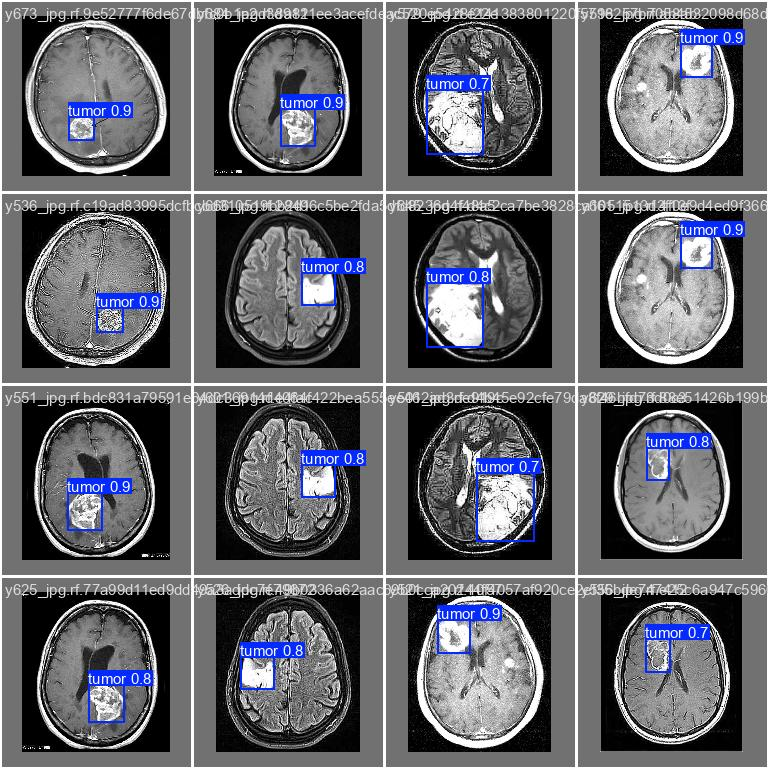

In [ ]:
val_batch2_pred_path = '/kaggle/working/runs/detect/train/val_batch2_pred.jpg'
val_batch2_pred = Image.open(val_batch2_pred_path)
display(val_batch2_pred)

# Section 11: Compute Mean Average Precision (mAP)

In [ ]:
# Load validation dataset for evaluation
ds = sv.DetectionDataset.from_yolo(
    images_directory_path = "/kaggle/working/BrainTumor-Br35H-3/valid/images",
    annotations_directory_path = "/kaggle/working/BrainTumor-Br35H-3/valid/labels",
    data_yaml_path = "/kaggle/working/BrainTumor-Br35H-3/data.yaml"
)
ds.classes

['tumor']

In [31]:
# Load the best trained model weights
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Generate predictions and collect ground truth
predictions = []
targets = []

for _, image, target in ds:
  results = model(image, verbose=False)[0]
  detections = sv.Detections.from_ultralytics(results)
  predictions.append(detections)
  targets.append(target)

# Compute mAP metrics
map_metric = MeanAveragePrecision().update(predictions, targets).compute()

In [32]:
# Display mAP results
print("mAP 50:95 ------> ", map_metric.map50_95)
print("mAP 75 ------> ", map_metric.map75)
print("mAP 50 ------> ", map_metric.map50)

mAP 50:95 ------>  0.677193130330609
mAP 75 ------>  0.839806967438995
mAP 50 ------>  0.9173500608527166


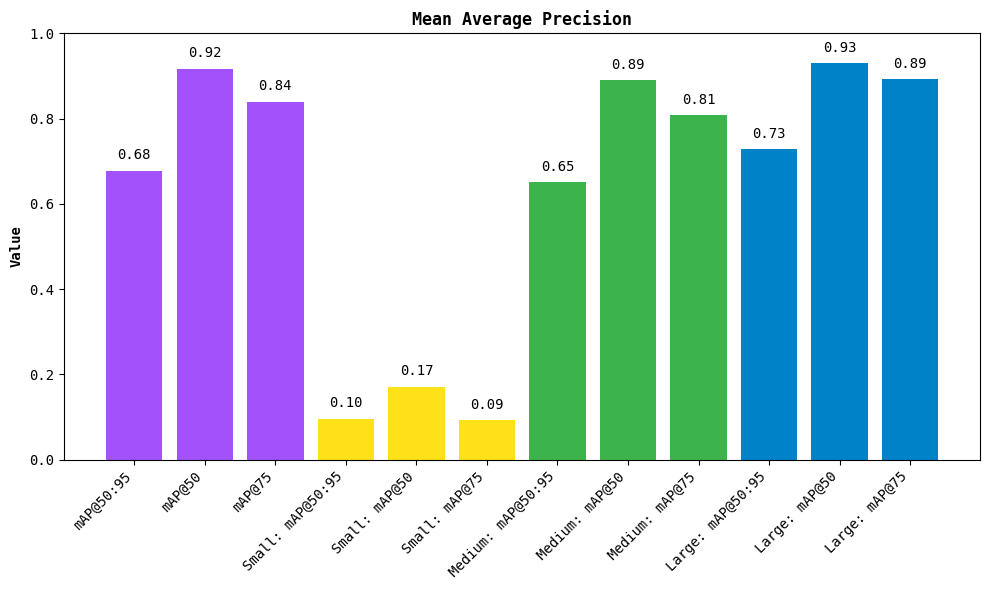

In [33]:
# Visualize mAP
map_metric.plot()

# Section 12: Inference on a Random Validation Image

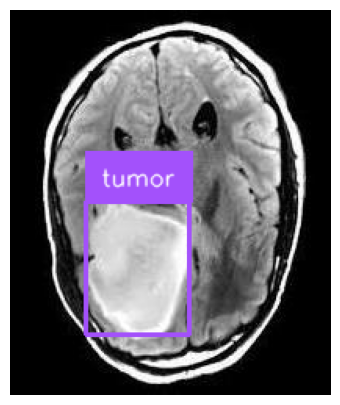

In [34]:
# Select a random image from the validation set for inference
i = random.randint(0, len(ds) - 1)
image_path, image, target = ds[i]

# Perform inference and apply non-maximum suppression
results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

# Annotate the image with bounding boxes and labels
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# Display the annotated image
sv.plot_image(annotated_image, size=(5,5))